In [ ]:
!pip install liac-arff


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for liac-arff: filename=liac_arff-2.5.0-py3-none-any.whl size=11732 sha256=7c0c6518e29732954af7fd434f5f5014cac39e05aaead03b383b7b60c49cd1ae
  Stored in directory: /root/.cache/pip/wheels/08/82/8b/5c514221984e88c059b94e36a71d4722e590acaae04deab22e
Successfully built liac-arff


In [ ]:
# import libraries
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import requests
import arff
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay, accuracy_score, confusion_matrix,accuracy_score, roc_curve, auc # plot evaluations
from sklearn.model_selection import cross_val_score, cross_val_predict


In [ ]:
# get data from online
df_arff = requests.get('https://utexas.box.com/shared/static/u8s1nl2c8b3ijv94z7npg7jl0drml5u0.arff')

# read as arff file
df_arff = arff.load(df_arff.text)
col_val = [attribute[0] for attribute in df_arff['attributes']]

# transform arff file into pandas dataframe
new_df = pd.DataFrame(df_arff['data'], columns = col_val)
meta = df_arff['attributes']

def clean_df(df):
  cols = list(df.columns)
  for col in cols:
    try:
      # df = df.replace({col: {'YES': True, 'NO': False}})
            df = df.replace({col: {'1': True, '0': False}})
    except:
      pass
    pass
  return df

new_df = clean_df(new_df)
new_df = pd.get_dummies(new_df)

In [ ]:
# read in csv data
df_csv = pd.read_csv('https://utexas.box.com/shared/static/24dmtadnoxzjqwm04tpdjseqz1msclyk.csv')
df_csv

,league,games,minutes,pts,offReb,defReb,reb,asts,stl,blk,...,ftm,tpa,tpm,totalSeasons,Position,firstSeason,lastSeason,careerEnded,yrsRetired2004,class
0,N,408,9825,5232,476,824,1300,866,265,175,...,1125,153,45,9,G,1982,1990,1,14,0
1,N,51,0,587,0,0,0,158,0,0,...,143,0,0,1,G,1949,1949,1,55,0
2,N,265,0,1712,0,0,72,311,0,0,...,402,0,0,5,G,1946,1950,1,54,0
3,N,133,2587,992,55,198,253,291,123,14,...,102,349,134,2,G,2003,2004,0,0,0
4,N,8,28,7,0,2,2,0,0,0,...,3,0,0,1,G,2004,2004,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
490,N,262,5229,2508,214,468,682,507,319,101,...,288,6,2,4,G,1976,1979,1,25,0
491,N,3,0,0,0,0,0,0,0,0,...,0,0,0,1,F,1946,1946,1,58,0
492,N,814,19241,9948,140,282,4555,1112,89,16,...,2054,0,0,12,F,1963,1974,1,30,0
493,N,98,1220,345,71,248,319,48,27,42,...,47,3,2,3,F,2000,2002,1,2,0


In [ ]:
new_df


,games,minutes,pts,offReb,defReb,reb,asts,stl,blk,turnover,...,firstSeason,lastSeason,careerEnded,yrsRetired2004,class,league_A,league_N,Position_C,Position_F,Position_G
0,408.0,9825.0,5232.0,476.0,824.0,1300.0,866.0,265.0,175.0,700.0,...,1982.0,1990.0,1.0,14.0,False,0,1,0,0,1
1,51.0,0.0,587.0,0.0,0.0,0.0,158.0,0.0,0.0,0.0,...,1949.0,1949.0,1.0,55.0,False,0,1,0,0,1
2,265.0,0.0,1712.0,0.0,0.0,72.0,311.0,0.0,0.0,0.0,...,1946.0,1950.0,1.0,54.0,False,0,1,0,0,1
3,133.0,2587.0,992.0,55.0,198.0,253.0,291.0,123.0,14.0,207.0,...,2003.0,2004.0,0.0,0.0,False,0,1,0,0,1
4,8.0,28.0,7.0,0.0,2.0,2.0,0.0,0.0,0.0,1.0,...,2004.0,2004.0,0.0,0.0,False,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
490,262.0,5229.0,2508.0,214.0,468.0,682.0,507.0,319.0,101.0,289.0,...,1976.0,1979.0,1.0,25.0,False,0,1,0,0,1
491,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1946.0,1946.0,1.0,58.0,False,0,1,0,1,0
492,814.0,19241.0,9948.0,140.0,282.0,4555.0,1112.0,89.0,16.0,0.0,...,1963.0,1974.0,1.0,30.0,False,0,1,0,1,0
493,98.0,1220.0,345.0,71.0,248.0,319.0,48.0,27.0,42.0,85.0,...,2000.0,2002.0,1.0,2.0,False,0,1,0,1,0


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier


X = new_df.drop(columns='class')
y = new_df['class']

dt = DecisionTreeClassifier(criterion = "entropy", random_state=3).fit(X, y)
bm = BaggingClassifier(random_state=3).fit(X, y)
rf = RandomForestClassifier(criterion = 'entropy', random_state = 3).fit(X, y)
nb = MultinomialNB(force_alpha=True).fit(X, y)
kn = KNeighborsClassifier().fit(X, y)

dt_scores = cross_val_score(dt, X, y, cv=10)
bm_scores = cross_val_score(bm, X, y, cv=10)
rf_scores = cross_val_score(rf, X, y, cv=10)
nb_scores = cross_val_score(nb, X, y, cv=10)
kn_scores = cross_val_score(kn, X, y, cv=10)

print("Decision Tree Scores:", dt_scores, "\n")
print("Bagging Model Scores:", bm_scores, "\n")
print("Random Forest Scores:", rf_scores, "\n")
print("Naive Bayes Scores:", nb_scores, "\n")
print("K Neighbor Scores:", kn_scores, "\n")



# build and compare the results of your models using 10-fold cross validation here (display results for each)
# play with the parameters of each model to try and generate the best result

Decision Tree Scores: [0.96       1.         0.98       0.98       0.98       1.
 0.95918367 1.         0.93877551 0.95918367] 

Bagging Model Scores: [0.96       0.98       0.96       0.96       1.         1.
 0.97959184 0.95918367 0.93877551 0.95918367] 

Random Forest Scores: [0.96       1.         0.96       0.98       1.         0.97959184
 0.97959184 0.95918367 0.93877551 0.95918367] 

Naive Bayes Scores: [0.88       0.94       0.94       0.84       0.92       0.95918367
 0.73469388 0.93877551 0.87755102 0.83673469] 

K Neighbor Scores: [0.96       0.98       0.96       0.96       0.98       0.97959184
 0.97959184 0.97959184 0.93877551 0.97959184] 



In [ ]:
print("Decision Tree CV Average Score:", dt_scores.mean())
print("Bagging Model  CV Average Score:", bm_scores.mean())
print("Random Forest  CV Average Score:", rf_scores.mean())
print("Naive Bayes  CV Average Score:", nb_scores.mean())
print("K Neighbor  CV Average Score:", kn_scores.mean())

Decision Tree CV Average Score: 0.9757142857142858
Bagging Model  CV Average Score: 0.969673469387755
Random Forest  CV Average Score: 0.9716326530612245
Naive Bayes  CV Average Score: 0.8866938775510202
K Neighbor  CV Average Score: 0.9697142857142855


In [ ]:
dt_roc_score = cross_val_score(dt, X, y, cv=10, scoring='roc_auc')
bm_roc_score = cross_val_score(bm, X, y, cv=10, scoring='roc_auc')
rf_roc_score = cross_val_score(rf, X, y, cv=10, scoring='roc_auc')
nb_roc_score = cross_val_score(nb, X, y, cv=10, scoring='roc_auc')
kn_roc_score = cross_val_score(kn, X, y, cv=10, scoring='roc_auc')

print("AUC score Decision Tree:", dt_roc_score.mean())
print("AUC score Bagging:", bm_roc_score.mean())
print("AUC score Random Forest Tree:", rf_roc_score.mean())
print("AUC score MultinomialNB:", nb_roc_score.mean())
print("AUC score KNeighbor:", kn_roc_score.mean())


AUC score Decision Tree: 0.9144444444444444
AUC score Bagging: 0.9575555555555555
AUC score Random Forest Tree: 0.9566666666666668
AUC score MultinomialNB: 0.8939444444444444
AUC score KNeighbor: 0.9105555555555555


In [ ]:
print(new_df.corr()['class'].sort_values(ascending=False).head(4))



from sklearn.feature_selection import SelectKBest, chi2, mutual_info_classif




# apply SelectKBest to select the top 3 features based on Information gain
selector = SelectKBest(score_func=mutual_info_classif, k=3)
X_new = selector.fit_transform(X, y)
# get the indices of the selected features
selected_indices = selector.get_support(indices=True)
# get the names of the selected features
print("Info gain top 3 features: ",X.columns[selected_indices])


# apply SelectKBest to select the top 3 features based on chi2
selectorChi = SelectKBest(score_func=chi2, k=3)

X_new_chi = selectorChi.fit_transform(X,y)

selected_indices_chi = selectorChi.get_support(indices = True)

print("Chi-square top 3 features: ", X.columns[selected_indices_chi])


class    1.000000
ftm      0.712440
fta      0.711321
fga      0.688851
Name: class, dtype: float64
Info gain top 3 features:  Index(['fga', 'fta', 'ftm'], dtype='object')
Chi-square top 3 features:  Index(['minutes', 'pts', 'fga'], dtype='object')


In [ ]:
X

,games,minutes,pts,offReb,defReb,reb,asts,stl,blk,turnover,...,totalSeasons,firstSeason,lastSeason,careerEnded,yrsRetired2004,league_A,league_N,Position_C,Position_F,Position_G
0,408.0,9825.0,5232.0,476.0,824.0,1300.0,866.0,265.0,175.0,700.0,...,9.0,1982.0,1990.0,1.0,14.0,0,1,0,0,1
1,51.0,0.0,587.0,0.0,0.0,0.0,158.0,0.0,0.0,0.0,...,1.0,1949.0,1949.0,1.0,55.0,0,1,0,0,1
2,265.0,0.0,1712.0,0.0,0.0,72.0,311.0,0.0,0.0,0.0,...,5.0,1946.0,1950.0,1.0,54.0,0,1,0,0,1
3,133.0,2587.0,992.0,55.0,198.0,253.0,291.0,123.0,14.0,207.0,...,2.0,2003.0,2004.0,0.0,0.0,0,1,0,0,1
4,8.0,28.0,7.0,0.0,2.0,2.0,0.0,0.0,0.0,1.0,...,1.0,2004.0,2004.0,0.0,0.0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
490,262.0,5229.0,2508.0,214.0,468.0,682.0,507.0,319.0,101.0,289.0,...,4.0,1976.0,1979.0,1.0,25.0,0,1,0,0,1
491,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1946.0,1946.0,1.0,58.0,0,1,0,1,0
492,814.0,19241.0,9948.0,140.0,282.0,4555.0,1112.0,89.0,16.0,0.0,...,12.0,1963.0,1974.0,1.0,30.0,0,1,0,1,0
493,98.0,1220.0,345.0,71.0,248.0,319.0,48.0,27.0,42.0,85.0,...,3.0,2000.0,2002.0,1.0,2.0,0,1,0,1,0


In [ ]:
import pandas as pd


corr_matrix = df_csv.corr(method='pearson')

corr_sorted = corr_matrix['class'].sort_values(ascending=False)

top3corr = corr_sorted[1:4]
print(top3corr)


ftm    0.712440
fta    0.711321
fga    0.688851
Name: class, dtype: float64


<ipython-input-9-ba518c5dd96f>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df_csv.corr(method='pearson')


In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, roc_auc_score

clf = bm

features = ['ftm', 'fta', 'fga']
features2 = ['ftm', 'fta', 'fga', 'fgm']
features3 = ['ftm', 'fta', 'fga', 'games']
features4 = ['ftm', 'fta', 'fga', 'games', 'fgm']



#made field goals and free throws into ratios instead of cumulative across career
#slightly improved accuracy
X['ft_ratio'] = X['ftm']/(X['fta']+0.000000000001)
X['fg_ratio'] = X['fgm']/(X['fga']+0.000000000001)

X['fga_ratio'] = X['fga']/X['games']

# After backwards selection, all the ratios were kept
new = ['ft_ratio', 'fg_ratio', 'fga_ratio']

all = X.dropna().drop(features, axis = 1).columns.tolist()
all_drop_fgm = X.dropna().drop(features2, axis = 1).columns.tolist()
all2 = X.dropna().columns.tolist()
new_features = ['ft_ratio','fg_ratio'] 
adj = all + new_features
adj2 = all_drop_fgm + new_features 

initial = X.drop(new, axis = 1).columns.tolist()
ratios = X.drop(features4, axis = 1).columns.tolist()
ratios_inc_fgm_games = X.drop(features, axis = 1).columns.tolist()
ratios_inc_fgm = X.drop(features2, axis = 1).columns.tolist()
ratios_inc_games = X.drop(features3, axis = 1).columns.tolist()



#initial with no edits
scores = cross_val_score(clf, X[initial], y, cv=10, scoring ='roc_auc')
print(f"Initial Model Accuracy: {scores.mean():.3f}")

#includes everything
new_scores = cross_val_score(clf, X, y, cv=10, scoring ='roc_auc')
print(f"Model with New Feature Accuracy with ratios: {new_scores.mean():.3f}")

#includes everything but the features used to calculuate ratios 
new_scores = cross_val_score(clf, X[ratios], y, cv=10, scoring ='roc_auc')
print(f"Model with New Feature Accuracy w Ratios but excluding columns used for calc: {new_scores.mean():.3f}")

#includes everything but the features used to calculuate ratios except fgm and games
new_scores = cross_val_score(clf, X[ratios_inc_fgm_games], y, cv=10, scoring ='roc_auc')
print(f"Model with New Feature Accuracy w Ratios but columns used for calc except fgm and games: {new_scores.mean():.3f}")

#includes everything but the features used to calculuate ratios except fgm 
new_scores = cross_val_score(clf, X[ratios_inc_fgm], y, cv=10, scoring ='roc_auc')
print(f"Model with New Feature Accuracy w Ratios but columns used for calc except fgm: {new_scores.mean():.3f}")

#includes everything but the features used to calculuate ratios except games 
new_scores = cross_val_score(clf, X[ratios_inc_games], y, cv=10, scoring ='roc_auc')
print(f"Model with New Feature Accuracy w Ratios but columns used for calc except games: {new_scores.mean():.3f}")

new_X = X[ratios_inc_fgm_games]


Initial Model Accuracy: 0.958
Model with New Feature Accuracy with ratios: 0.952
Model with New Feature Accuracy w Ratios but excluding columns used for calc: 0.962
Model with New Feature Accuracy w Ratios but columns used for calc except fgm and games: 0.963
Model with New Feature Accuracy w Ratios but columns used for calc except fgm: 0.950
Model with New Feature Accuracy w Ratios but columns used for calc except games: 0.950


In [ ]:
import numpy as np

clf = bm

# Start with all features, uses model that excludes all features used for calculating ratios except fgm, includes ratios
# backwards selection

features = list(range(new_X.shape[1]))

# Keep track of the best subset and its score
best_subset = features.copy()
best_score = cross_val_score(clf, new_X.iloc[:, best_subset], y, cv=10).mean()

removed_features = []

# Iterate over feature subsets and select the best one
while len(features) > 1:
    # Evaluate the performance of removing each feature
    scores = []
    for feature in features:
        subset = features.copy()
        subset.remove(feature)
        score = cross_val_score(clf, new_X.iloc[:, subset], y, cv=10).mean()
        scores.append(score)

    # Identify the feature with the smallest impact on performance
    worst_feature = features[np.argmin(scores)]
    removed_features.append(worst_feature)

    # Remove the worst feature and update the best subset and score
    features.remove(worst_feature)
    if scores[np.argmin(scores)] > best_score:
        best_subset = features.copy()
        best_score = scores[np.argmin(scores)]

print("Best subset:", best_subset)
print("Best score:", best_score)
print("Removed features:", removed_features)


Best subset: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26]
Best score: 0.967591836734694
Removed features: [11, 25, 23, 16, 19, 24, 0, 6, 2, 26, 1, 20, 4, 13, 22, 12, 9, 7, 8, 18, 3, 15, 5, 17, 21, 14]


In [ ]:
print('Dropped: ', X.columns[removed_features])
dropped = X.columns[removed_features]
print('Kept: ', X.drop(dropped, axis = 1).columns)

Dropped:  Index(['fga', 'Position_F', 'league_N', 'tpm', 'lastSeason', 'Position_C',
       'games', 'asts', 'pts', 'Position_G', 'minutes', 'careerEnded',
       'defReb', 'fta', 'league_A', 'fgm', 'turnover', 'stl', 'blk',
       'firstSeason', 'offReb', 'tpa', 'reb', 'totalSeasons', 'yrsRetired2004',
       'ftm'],
      dtype='object')
Kept:  Index(['pf', 'ft_ratio', 'fg_ratio', 'fga_ratio'], dtype='object')


## 4. Investment Decisions

In [ ]:
from sklearn.model_selection import train_test_split

final_X =  X.drop(dropped, axis = 1)
#print(final_X)
for item in final_X.columns.tolist():
  print(item)
#print(final_X.columns.tolist())
X_train, X_test, y_train, y_test = train_test_split(final_X, y, random_state=3, test_size=0.33)

for item in X_test.columns.tolist():
  print(item)

pf
ft_ratio
fg_ratio
fga_ratio
pf
ft_ratio
fg_ratio
fga_ratio


In [ ]:
dt2 = DecisionTreeClassifier(criterion = "entropy", random_state=3).fit(X_train, y_train)
bm2 = BaggingClassifier(random_state=3).fit(X_train, y_train)
rf2 = RandomForestClassifier(criterion = 'entropy', random_state = 3).fit(X_train, y_train)
nb2 = MultinomialNB(force_alpha=True).fit(X_train, y_train)
kn2 = KNeighborsClassifier().fit(X_train, y_train)

In [ ]:

prob_df = pd.DataFrame()

prob_df['Actual Class'] = y_train
dt_prob_df = prob_df.iloc[:]
bg_prob_df = prob_df.iloc[:]
rf_prob_df = prob_df.iloc[:]
nb_prob_df = prob_df.iloc[:]
kn_prob_df = prob_df.iloc[:]


dt_prob_df['prob'] = [round(pred[1],4) for pred in cross_val_predict(dt2, X_train, y_train, cv=10, method='predict_proba')]
bg_prob_df['prob'] = [round(pred[1],4) for pred in cross_val_predict(bm2, X_train, y_train, cv=10, method='predict_proba')]
rf_prob_df['prob'] = [round(pred[1],4) for pred in cross_val_predict(rf2, X_train, y_train, cv=10, method='predict_proba')]
nb_prob_df['prob'] = [round(pred[1],4) for pred in cross_val_predict(nb2, X_train, y_train, cv=10, method='predict_proba')]
kn_prob_df['prob'] = [round(pred[1],4) for pred in cross_val_predict(kn2, X_train, y_train, cv=10, method='predict_proba')]


dt_prob_df = dt_prob_df.sort_values("prob", ascending = False)
bg_prob_df = bg_prob_df.sort_values("prob", ascending = False)
rf_prob_df = rf_prob_df.sort_values("prob", ascending = False)
nb_prob_df = nb_prob_df.sort_values("prob", ascending = False)
kn_prob_df = kn_prob_df.sort_values("prob", ascending = False)

In [ ]:
dt_prob_df["Predicted Class"] = (dt_prob_df.iloc[:,1] >= 0.0).astype(bool)
bg_prob_df["Predicted Class"] = (bg_prob_df.iloc[:,1] >= 0.0).astype(bool)
rf_prob_df["Predicted Class"] = (rf_prob_df.iloc[:,1] >= 0.0).astype(bool)
nb_prob_df["Predicted Class"] = (nb_prob_df.iloc[:,1] >= 0.0).astype(bool)
kn_prob_df["Predicted Class"] = (kn_prob_df.iloc[:,1] >= 0.0).astype(bool)

In [ ]:


#Decision Tree
budget = 4000000
max_players = 100
player_count = 0
total_cost = 0

for index, row in dt_prob_df.iterrows():
    if player_count >= max_players or total_cost >= budget:
        break
        
    if row["Actual Class"] == True and row["Predicted Class"] == True:
        cost = 80000
        if total_cost + cost <= budget and player_count + 1 <= max_players:
            dt_prob_df.at[index, "Profit by Record"] = cost
            total_cost += cost
            player_count += 1
    elif row["Actual Class"] == False and row["Predicted Class"] == True:
        cost = -20000
        if total_cost + cost <= budget and player_count + 1 <= max_players:
            dt_prob_df.at[index, "Profit by Record"] = cost
            total_cost += cost
            player_count += 1
    else:
        dt_prob_df.at[index, "Profit by Record"] = 0
        
dt_prob_df["Profit"] = dt_prob_df["Profit by Record"].cumsum()


#Bagging
for index, row in bg_prob_df.iterrows():
    if player_count >= max_players or total_cost >= budget:
        break
        
    if row["Actual Class"] == True and row["Predicted Class"] == True:
        cost = 80000
        if total_cost + cost <= budget and player_count + 1 <= max_players:
            bg_prob_df.at[index, "Profit by Record"] = cost
            total_cost += cost
            player_count += 1
    elif row["Actual Class"] == False and row["Predicted Class"] == True:
        cost = -20000
        if total_cost + cost <= budget and player_count + 1 <= max_players:
            bg_prob_df.at[index, "Profit by Record"] = cost
            total_cost += cost
            player_count += 1
    else:
        bg_prob_df.at[index, "Profit by Record"] = 0
        
bg_prob_df["Profit"] = bg_prob_df["Profit by Record"].cumsum()

#Random Forest
for index, row in rf_prob_df.iterrows():
    if player_count >= max_players or total_cost >= budget:
        break
        
    if row["Actual Class"] == True and row["Predicted Class"] == True:
        cost = 80000
        if total_cost + cost <= budget and player_count + 1 <= max_players:
            rf_prob_df.at[index, "Profit by Record"] = cost
            total_cost += cost
            player_count += 1
    elif row["Actual Class"] == False and row["Predicted Class"] == True:
        cost = -20000
        if total_cost + cost <= budget and player_count + 1 <= max_players:
            rf_prob_df.at[index, "Profit by Record"] = cost
            total_cost += cost
            player_count += 1
    else:
        rf_prob_df.at[index, "Profit by Record"] = 0
        
rf_prob_df["Profit"] = rf_prob_df["Profit by Record"].cumsum()

#Naive Bayes
for index, row in nb_prob_df.iterrows():
    if player_count >= max_players or total_cost >= budget:
        break
        
    if row["Actual Class"] == True and row["Predicted Class"] == True:
        cost = 80000
        if total_cost + cost <= budget and player_count + 1 <= max_players:
            nb_prob_df.at[index, "Profit by Record"] = cost
            total_cost += cost
            player_count += 1
    elif row["Actual Class"] == False and row["Predicted Class"] == True:
        cost = -20000
        if total_cost + cost <= budget and player_count + 1 <= max_players:
            nb_prob_df.at[index, "Profit by Record"] = cost
            total_cost += cost
            player_count += 1
    else:
        nb_prob_df.at[index, "Profit by Record"] = 0
        
nb_prob_df["Profit"] = nb_prob_df["Profit by Record"].cumsum()

#KNN
for index, row in kn_prob_df.iterrows():
    if player_count >= max_players or total_cost >= budget:
        break
        
    if row["Actual Class"] == True and row["Predicted Class"] == True:
        cost = 80000
        if total_cost + cost <= budget and player_count + 1 <= max_players:
            kn_prob_df.at[index, "Profit by Record"] = cost
            total_cost += cost
            player_count += 1
    elif row["Actual Class"] == False and row["Predicted Class"] == True:
        cost = -20000
        if total_cost + cost <= budget and player_count + 1 <= max_players:
            kn_prob_df.at[index, "Profit by Record"] = cost
            total_cost += cost
            player_count += 1
    else:
        kn_prob_df.at[index, "Profit by Record"] = 0
        
kn_prob_df["Profit"] = kn_prob_df["Profit by Record"].cumsum()

In [ ]:
# Use dictionaries to store profits, with a new index
profit_dt = {i+1: val for i, val in enumerate(dt_prob_df["Profit"])}
profit_bg = {i+1: val for i, val in enumerate(bg_prob_df["Profit"])}
profit_rf = {i+1: val for i, val in enumerate(rf_prob_df["Profit"])}
profit_nb = {i+1: val for i, val in enumerate(nb_prob_df["Profit"])}
profit_kn = {i+1: val for i, val in enumerate(kn_prob_df["Profit"])}

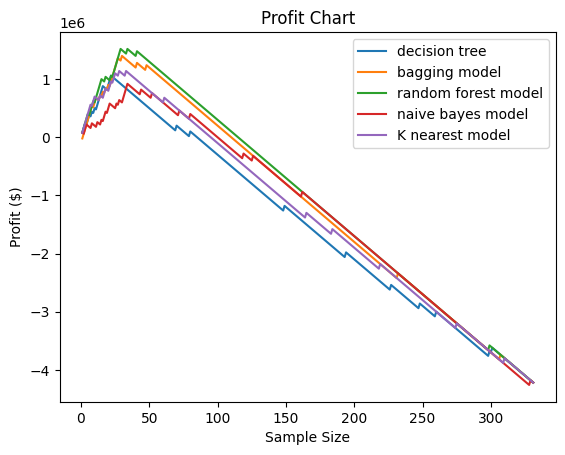

In [ ]:
import matplotlib.pyplot as plt

# Prepare profit chart.
plt.plot(list(profit_dt.keys()), list(profit_dt.values()), label = "decision tree")
plt.plot(list(profit_bg.keys()), list(profit_bg.values()), label = "bagging model")
plt.plot(list(profit_rf.keys()), list(profit_rf.values()), label = "random forest model")
plt.plot(list(profit_nb.keys()), list(profit_nb.values()), label = "naive bayes model")
plt.plot(list(profit_kn.keys()), list(profit_kn.values()), label = "K nearest model")


plt.xlabel("Sample Size")
plt.ylabel("Profit ($)")
plt.legend()
plt.title("Profit Chart")

plt.show()

In [ ]:
# Find the estimated probability for the record at which profit is maximized for each model. Records are already ranked by descending probability.
dt_optimal_prob = dt_prob_df.at[dt_prob_df["Profit"].idxmax(), "prob"]
bg_optimal_prob = bg_prob_df.at[bg_prob_df["Profit"].idxmax(), "prob"]
rf_optimal_prob = rf_prob_df.at[rf_prob_df["Profit"].idxmax(), "prob"]
nb_optimal_prob = nb_prob_df.at[nb_prob_df["Profit"].idxmax(), "prob"]
kn_optimal_prob = kn_prob_df.at[kn_prob_df["Profit"].idxmax(), "prob"]


# Find the maximum profit.
dt_optimal_profit = dt_prob_df.at[dt_prob_df["Profit"].idxmax(), "Profit"]
bg_optimal_profit = bg_prob_df.at[bg_prob_df["Profit"].idxmax(), "Profit"]
rf_optimal_profit = rf_prob_df.at[rf_prob_df["Profit"].idxmax(), "Profit"]
nb_optimal_profit = nb_prob_df.at[nb_prob_df["Profit"].idxmax(), "Profit"]
kn_optimal_profit = kn_prob_df.at[kn_prob_df["Profit"].idxmax(), "Profit"]


print("Optimal probability for decision tree model is", dt_optimal_prob, "with profit", f"${dt_optimal_profit:,.0f}")
print("Optimal probability for bagging model is", bg_optimal_prob, "with profit", f"${bg_optimal_profit:,.0f}")
print("Optimal probability for random forest model is", rf_optimal_prob, "with profit", f"${rf_optimal_profit:,.0f}")
print("Optimal probability for naive bayes model is", nb_optimal_prob, "with profit", f"${nb_optimal_profit:,.0f}")
print("Optimal probability for KNN model is", kn_optimal_prob, "with profit", f"${kn_optimal_profit:,.0f}")

Optimal probability for decision tree model is 1.0 with profit $1,060,000
Optimal probability for bagging model is 0.2 with profit $1,400,000
Optimal probability for random forest model is 0.28 with profit $1,520,000
Optimal probability for naive bayes model is 0.9012 with profit $920,000
Optimal probability for KNN model is 0.4 with profit $1,140,000


In [ ]:
dt_roc_score = cross_val_score(dt2, X, y, cv=10, scoring='roc_auc')
bm_roc_score = cross_val_score(bm2, X, y, cv=10, scoring='roc_auc')
rf_roc_score = cross_val_score(rf2, X, y, cv=10, scoring='roc_auc')
nb_roc_score = cross_val_score(nb2, X, y, cv=10, scoring='roc_auc')
kn_roc_score = cross_val_score(kn2, X, y, cv=10, scoring='roc_auc')

print("AUC score Decision Tree:", dt_roc_score.mean())
print("AUC score Bagging:", bm_roc_score.mean())
print("AUC score Random Forest Tree:", rf_roc_score.mean())
print("AUC score MultinomialNB:", nb_roc_score.mean())
print("AUC score KNeighbor:", kn_roc_score.mean())

AUC score Decision Tree: 0.8625
AUC score Bagging: 0.9521111111111111
AUC score Random Forest Tree: 0.9777222222222222
AUC score MultinomialNB: 0.8939444444444444
AUC score KNeighbor: 0.9105555555555555


In [ ]:
# Return the records of the population that will be targeted in the test set as only those records with a probability greater than 62.67% under the bagging model
# (which is the probability that maximizes profit).
df = pd.concat([X_test, y_test], axis=1)
df['proba'] = [round(pred[1],4) for pred in (rf2).predict_proba(X_test)]
target_df = df.loc[df['proba'] >= 0.28].sort_values("proba", ascending = False)
#pd.options.display.max_rows = 200

target_df

,pf,ft_ratio,fg_ratio,fga_ratio,class,proba
73,3855.0,0.800770,0.452076,16.765597,True,0.98
87,2388.0,0.797689,0.450473,15.610738,True,0.93
114,2764.0,0.809501,0.421447,18.729313,True,0.86
228,2931.0,0.837670,0.484608,18.865385,True,0.86
83,1580.0,0.794017,0.434617,17.431559,False,0.80
330,2212.0,0.746597,0.474440,15.011348,False,0.79
80,2180.0,0.785850,0.489773,15.170909,True,0.79
179,1674.0,0.831047,0.451524,17.272727,False,0.76
394,1865.0,0.820442,0.441141,21.314590,True,0.68
10,1604.0,0.799290,0.457863,16.092466,False,0.67


In [ ]:
print('Target Players: ', target_df.index)

budget = 4000000
max_players = 100
player_count = 0
total_cost = 0

num_true = (target_df['class'] == True).sum()
num_false = (target_df['class'] == False).sum()
profit = 80000*num_true - 20000*num_false
print(f"Profit: ${profit}")



Target Players:  Int64Index([ 73,  87, 114, 228,  83, 330,  80, 179, 394,  10, 397,  14, 415,
            427, 287,  24, 204, 112, 340, 353, 209, 175],
           dtype='int64')
Profit: $1160000


## Attribute Descriptions

Field | Description
------|------------
league| N = National Basketball Association (NBA); A = American Basketball Association (ABA)
games|games played
minutes|minutes played
pts|points
offReb|offensive rebounds
defReb|defensive rebounds
reb|rebounds
asts|assists
stl|steals* (see below)
blk|blocks* (see below)
turnover|turnovers* (see below)
pf|Personal Fouls
fga|field goals attempted
fgm|field goals made
fta|free throws attempted
ftm|free throws made
tpa|three pointers attempted* (see below)
tpm|three pointers made* (see below)
totalSeasons|Total number of seasons played. This value is calculated as follows: "lastSeason - firstSeason + 1"
position|C = Center; F = Forward; G = Guard
firstSeason|First season played. The year corresponds to the first year of the season (i.e. a value of 2000 represents the 2000-2001 season). 
lastSeason|Last season played. The year corresponds to the first year of the season (i.e. a value of 2000 represents the 2000-2001 season). Note that 2004 (2004-2005 season) is the last year for which there is data. 
careerEnded|Boolean field for if the player's career has ended (1 if career has ended, 0 otherwise). This field was calculated as follows: if the "lastSeason" field is earlier than 2004, the value is 1, otherwise 0. Note that this calculation naively assumes that no players retired at the end of the 2004  season.
yrsRetired2004|The number of seasons that a player has been retired as of the 2004-2005 season.
class|A Boolean field showing whether or not a player was inducted to the Basketball Hall of Fame (HoF) as a player. This field has value 1 if the player has been inducted, and 0 otherwise.




* The NBA did not have three point shots until 1979
* Steals, Blocks and Turnovers were not recorded in the NBA until 1973